# Examples of Realtime Plots

See: [this sparkfun article](https://learn.sparkfun.com/tutorials/graph-sensor-data-with-python-and-matplotlib/update-a-graph-in-real-time)

And: [this towardsdatascience article](https://towardsdatascience.com/matplotlib-animations-in-jupyter-notebook-4422e4f0e389#:~:text=Interactive%20Plot%20in%20Jupyter%20Notebook,-In%20order%20to&text=Especially%20FuncAnimation%20class%20that%20can,create%20an%20animation%20for%20you.&text=Next%2C%20we%20need%20to%20create,and%20a%20single%20Axes%20ax%20)


In [ ]:
# Some dependencies you might need...
!pip install jupyterplot python-osc networkx

In [1]:
import asyncio
from time import time
import traceback
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.animation as animation
import randomimport IPython
from jupyterplot import ProgressPlot
from scipy import integrate
from pythonosc.udp_client import SimpleUDPClient

<IPython.core.display.Javascript object>


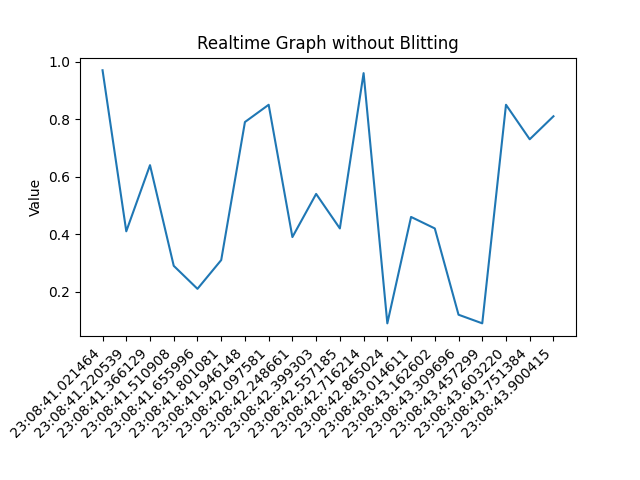

In [23]:
# Enable interactive plot
%matplotlib notebook

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = []
ys = []

# This function is called periodically from FuncAnimation
def animate(i, xs, ys):

    # Read temperature (Celsius) from TMP102
    val = round(random.random(), 2)

    # Add x and y to lists
    xs.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
    ys.append(val)

    # Limit x and y lists to 20 items
    xs = xs[-20:]
    ys = ys[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys)

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('Realtime Graph without Blitting')
    plt.ylabel('Value')

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(xs, ys), interval=100)
plt.show()

<IPython.core.display.Javascript object>


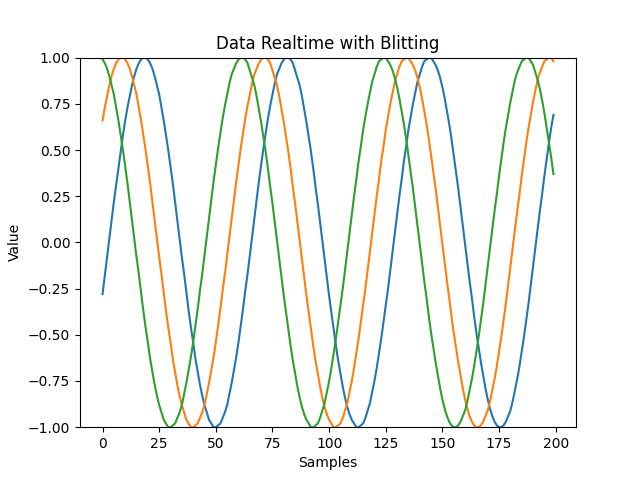

In [56]:
# Similar animation using blitting
# This will animate faster, but with fixed axes (axes do not autoscale)

# Enable interactive plot
%matplotlib notebook

# Parameters
x_len = 200         # Number of points to display
y_range = [-1, 1.0]  # Range of possible Y values to display

sim = {
    'xs': list(range(0, 200)),
    'ys': [
    [0] * x_len,
    [0] * x_len,
    [0] * x_len,
],
    'rad': 0.0,
    'radstep': 0.1,
}

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(y_range)

# Create our lines. We will update the lines in animate
lines = []
for i in range(len(ys)):
    line, = ax.plot(xs, ys[i])
    lines.append(line)

# Add labels
plt.title('Data Realtime with Blitting')
plt.xlabel('Samples')
plt.ylabel('Value')

rad=0.0


# This function is called periodically from FuncAnimation
def animate_frame(i, sim):
    ys = sim['ys']
    # Add y to each list
    for i in range(len(ys)):
        ys[i].append(round(np.sin(sim['rad']+i), 2))
        #ys[i].append(round(random.random(), 2))
        # Limit y list to set number of items
        ys[i] = ys[i][-x_len:]
        # Update line with new Y values
        lines[i].set_ydata(ys[i])
    
    sim['rad'] += sim['radstep']
    #print(rad)
    
    return lines

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig,
    animate_frame,
    fargs=(sim,),
    interval=100, # in ms
    blit=True)

plt.show()

In [44]:
# Realtime Plot using ProgressPlot


line_names = ['a','b','c']
x_len = 400         # Number of points to display
y_range = [-1.0, 1.0]  # Range of possible Y values to display
ys = [
    [0] * x_len,
    [0] * x_len,
    [0] * x_len,
]

realtime_plot = ProgressPlot(line_names=line_names, y_lim=y_range, width=800, height=400)

# for i in range(200):
#     vals = []
#     for j in range(3):
#         vals.append(round(random.random(),2))
#     realtime_plot.update([vals])

async def generate_plot(realtime_plot, update_every, ys):
    step=0
    rad=0.0
    radstep=0.4
    while step < 100:
        newval = []
        for i in range(len(ys)):
            newval.append(round(np.sin(rad+i), 2))
            #newval.append(round(random.random(), 2))
        
        realtime_plot.update([newval])
        await asyncio.sleep(update_every)
        step += 1
        rad += radstep

    # When done... commit the plot to the notebook using .finalize()
    realtime_plot.finalize()

loop=asyncio.get_event_loop()
task=loop.create_task(generate_plot(realtime_plot=realtime_plot, update_every=0.1, ys=ys))

